In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

exp = 'exp5'
with open(exp + '_unlabeled.out') as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)

df['lipton-excess'] = df['lipton'] - df['bayes_error']
df['oracle-excess'] = df['oracle'] - df['bayes_error']

measure = ['lipton-excess', 'oracle-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

result

n_source n_target lipton-excess           oracle-excess          
                              mean       std          mean       std
0        25      100      0.255549  0.179304      0.066393  0.046189
1        50       10      0.268411  0.148642      0.087911  0.045705
2        50       20      0.236658  0.149449      0.084515  0.044145
3        50       40      0.257046  0.148899      0.089446  0.052623
4        50       80      0.244515  0.154995      0.085026  0.051536
5        50      100      0.271718  0.158921      0.094673  0.066386
6        50      160      0.263615  0.155368      0.092791  0.056541
7        50      320      0.269667  0.153186      0.091750  0.047944
8        50      640      0.263316  0.150219      0.096542  0.052669
9        50     1280      0.285727  0.145887      0.091339  0.055382
10       50     2560      0.245041  0.145978      0.088791  0.045679
11       50     5120      0.251039  0.142062      0.096723  0.049539
12      100      100      0.230226  0.115319      0.095122  0.045440
13      200      100      0.227466  0.093478      0.090232  0.049292
14      400      100      0.213591  0.090500      0.082457  0.041888
15      800      100      0.197187  0.072187      0.066774  0.051065
16     1600      100      0.192298  0.062856      0.053681  0.051087
17     3200      100      0.183792  0.056100      0.043180  0.041407
18     6400      100      0.152251  0.057831      0.031506  0.039747
19    12800      100      0.147789  0.046338      0.027089  0.046598

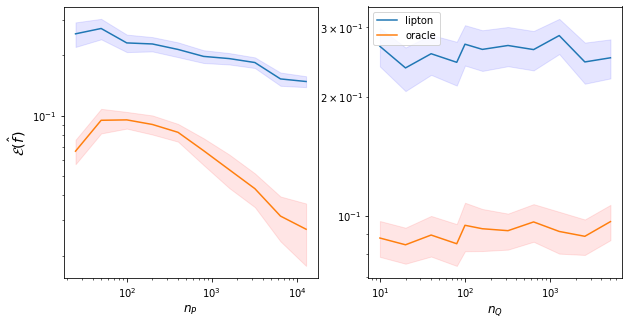

In [2]:
result1 = result.loc[result['n_target'] == 100]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['lipton-excess']['mean'], result1['lipton-excess']['std']
mean_o, std_o = result1['oracle-excess']['mean'], result1['oracle-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 50]

n, mean, std = result2['n_target'], result2['lipton-excess']['mean'], result2['lipton-excess']['std']
mean_o, std_o = result2['oracle-excess']['mean'], result2['oracle-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('lipton', 'oracle'), loc='middle left')
plt.show()

In [3]:
with open(exp + '_labeled.out') as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)

df['classical-excess'] = df['classical'] - df['bayes_error']
df['labeled-excess'] = df['labeled'] - df['bayes_error']

measure = ['classical-excess', 'labeled-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

result

n_source n_target classical-excess           labeled-excess          
                                 mean       std           mean       std
0        50      150         0.073363  0.050977       0.075889  0.048691
1        50      350         0.063481  0.040070       0.066481  0.041062
2        50      750         0.049782  0.037758       0.051032  0.039108
3        50     1550         0.042931  0.042366       0.043653  0.042417
4        50     3150         0.031097  0.041639       0.032128  0.043439
5        50     6350         0.034324  0.045923       0.034222  0.045743
6        50    12750         0.015773  0.041905       0.016080  0.041773
7       150       50         0.052000  0.043510       0.070152  0.047348
8       350       50         0.065055  0.043154       0.081586  0.048611
9       750       50         0.053768  0.047499       0.058990  0.049619
10     1550       50         0.063104  0.047316       0.057846  0.049340
11     3150       50         0.061844  0.048989       0.054371  0.043365
12     6350       50         0.062782  0.047983       0.040803  0.045299
13    12750       50         0.058574  0.056116       0.030207  0.044500

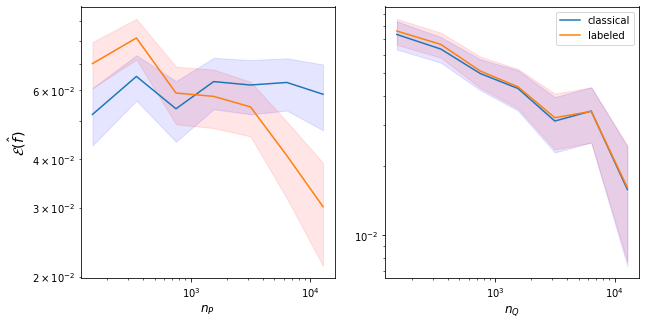

In [4]:
result1 = result.loc[result['n_target'] == 50]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['classical-excess']['mean'], result1['classical-excess']['std']
mean_o, std_o = result1['labeled-excess']['mean'], result1['labeled-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 50]

n, mean, std = result2['n_target'], result2['classical-excess']['mean'], result2['classical-excess']['std']
mean_o, std_o = result2['labeled-excess']['mean'], result2['labeled-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('classical', 'labeled'), loc='middle left')
plt.show()